# Holistic Approach
## - Sampurna

#Abstract
In this notebook, we will holistically look at the culmination of all the notebooks we have published previously. The purpose of this notebook is to give a detailed view of how we have used the crypto market dataset, how accurately we have predicted, what methods we have employed and what did we learn after performing these tasks on our dataset.

The dataset we are dealing with consists of crypto token and their prices over a range of time. The nature of the data is of time series and is usually quite difficult to interpret as markets tend to be baised towards the latest market trends and most importantly to human sentiments. Sentiment Analysis is another field of machine learning whihc can be used to improve accuracy of the model and the prediction but for the scope of this notebook we will strictly focus on a idealistic model that can be replicated and how it will be construed against the test data.

Now that we have a basic understanding of how our data, we can use data science methods taht we have showed in the previous


#**EDA**
First we will load the dataframe from the appropriate github link where we have uplaoded the dataset in a csv format

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

crypto_df = pd.read_csv("https://media.githubusercontent.com/media/sampurng/INFO6105/main/crypto-markets.csv")

btc_df = crypto_df.loc[crypto_df["symbol"] == "BTC"]

btc_df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


##Data Types

After observing the data we can confidently say that the dataset contains numerical and categorical data.
###**Categorical Data**
- `slug`
- `symbol`
- `name`
- `date`
- `ranknow`

###**Numerical Data**
- `open($)`
- `high($)`
- `low($)`
- `close($)`
- `volume()`
- `close_ratio`
- `market`

With this we can say that our dataset does not contain any duplicated values and that we can proceed to other mehtods.

##Distributions

For the distribution of our features, we can use qq-plots to check it and see if there's any adjustment required for our feature varaibles.
###Open

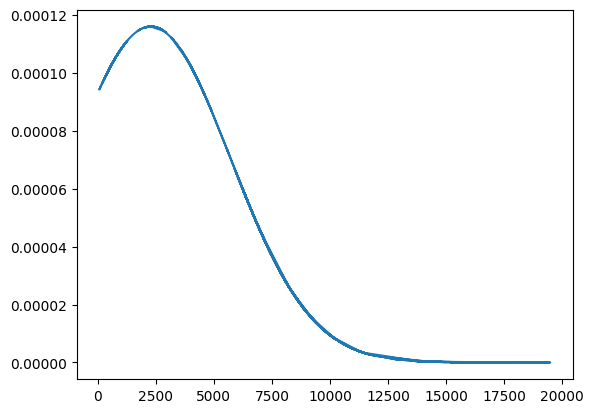

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np

standardDeviation = btc_df['open'].std()
mean = btc_df['open'].mean()

plt.plot(btc_df['open'], norm.pdf(btc_df['open'], mean, standardDeviation))


def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()

def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)


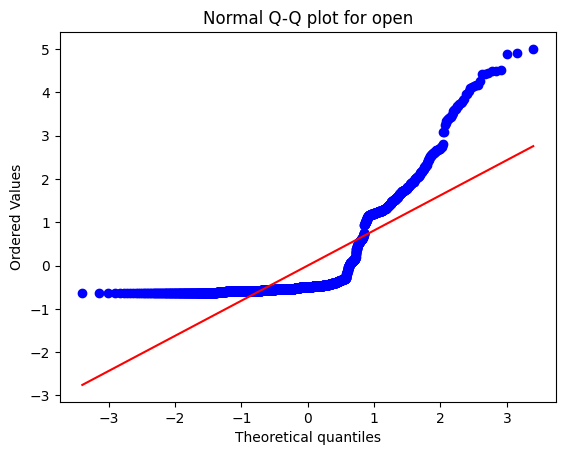

<ipython-input-13-5250b2547b31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(btc_df['open'])


<Axes: xlabel='open', ylabel='Density'>

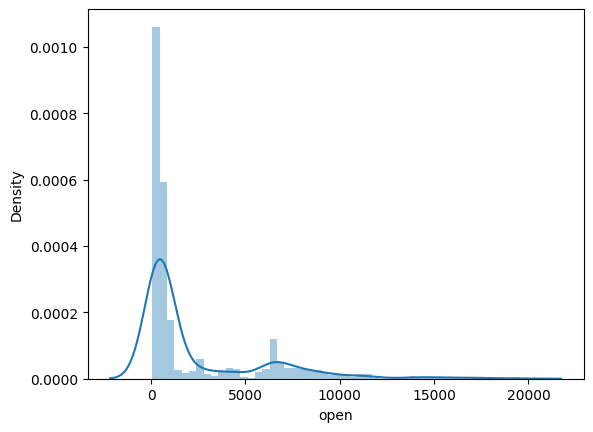

In [13]:
qqplot_df(btc_df[['open']])
sns.distplot(btc_df['open'])


We can observe that the opening price of bitcoin for every day from 2017-18 does not follow a normal distribution and leans more towards a ```fat tailed``` distribution. We can observe similar behaviour with other values which also follow a similar trend such as `high` `low` `close` and `market`

###Close Ratio
We can observe a differnece in another value which is the `close_ratio`. This value is determined by the following formula

\begin{align}
    close\_ratio = \frac{close - low \,}{high - low}
\end{align}

we can see the distribution that close ratio follows with the help of a normal q-q plot and a distplot





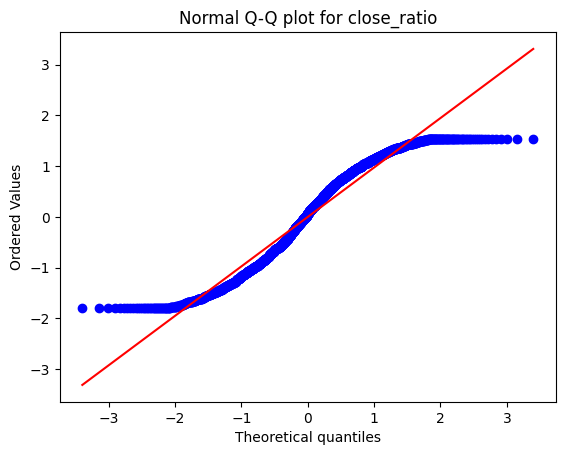

<ipython-input-17-f4da68dfac5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(btc_df['close_ratio'])


<Axes: xlabel='close_ratio', ylabel='Density'>

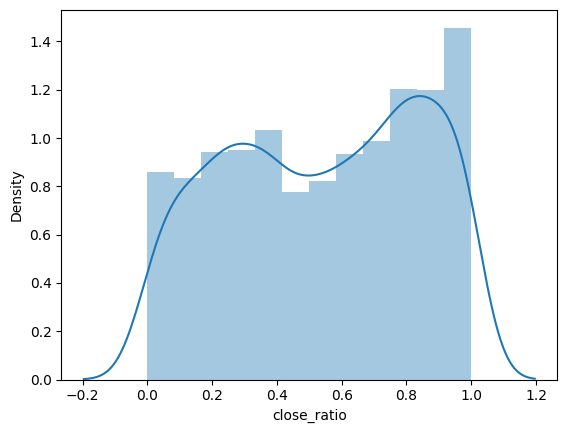

In [17]:
qqplot_df(btc_df[['close_ratio']])
sns.distplot(btc_df['close_ratio'])


From the first plot we can observe that it follows somewhat of a normal curve except at the ends of the observations but with a distplot its clear that the close ratio for BTC follows a `bimodal distribution`

###Rest of the features


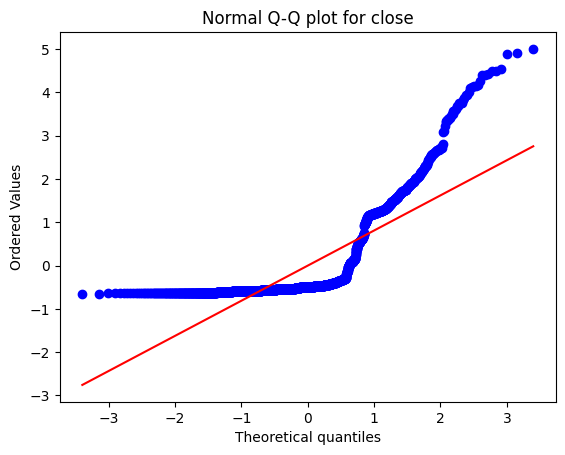

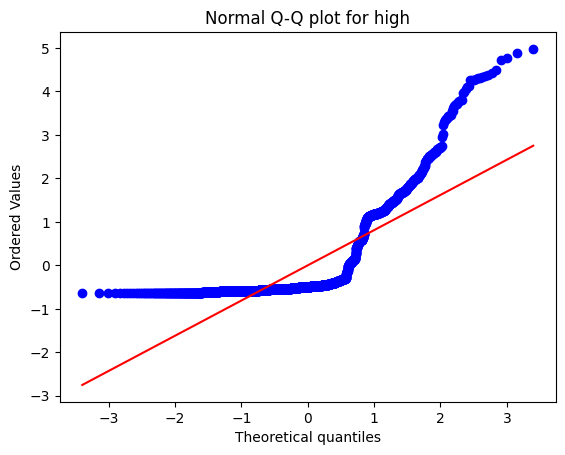

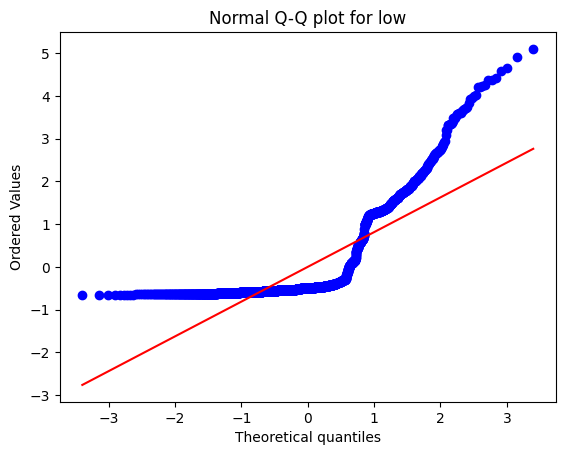

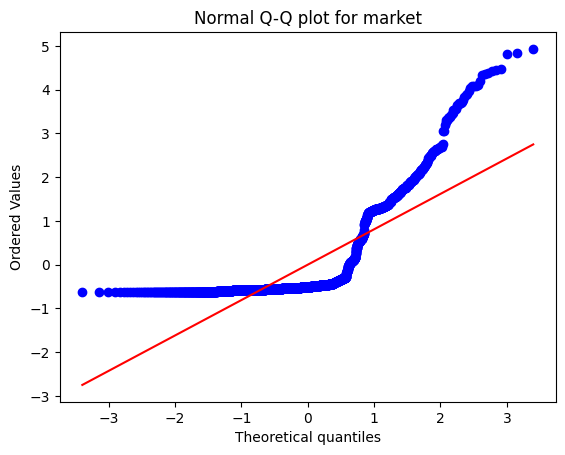

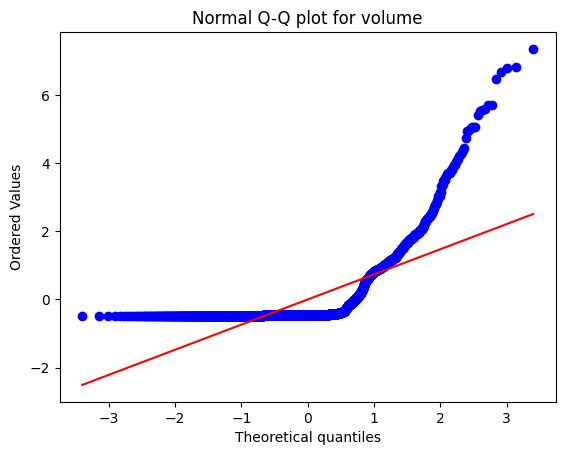

In [18]:
newBTC = btc_df[['close', 'high', 'low', 'market', 'volume']]
qqplot_df(newBTC)


## Multicolinearity

We can check for multicolinearity in our data using `variable inflation factor` score for all out feature variables. It can bechecked as follows.

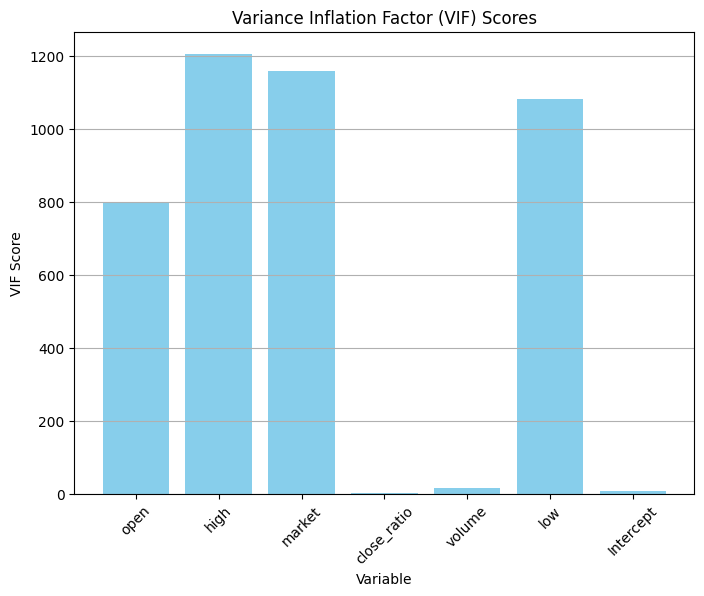

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = btc_df[[ 'open', 'high', 'market', 'close_ratio', 'volume', 'low']].copy()
vif_data['Intercept'] = 1

vif_scores = pd.DataFrame()
vif_scores["Variable"] = vif_data.columns
vif_scores["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Plotting the VIF
plt.figure(figsize=(8, 6))
plt.bar(vif_scores["Variable"], vif_scores["VIF"], color='skyblue')
plt.xlabel("Variable")
plt.ylabel("VIF Score")
plt.title("Variance Inflation Factor (VIF) Scores")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


#**Data Cleaning**


##Missing Values

To check for any missing values that might be present in the dataset, we can run a simple command to check the entire dataframe for all the null or the NaN values that might be present in the dataframe.

In [3]:
btc_df.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

Since there are no missing values, we can explore imputation methodologies to see how our data will react if we had some arbiraty missing values.



In [29]:
import warnings
warnings.filterwarnings('ignore')


# creating 1% 5% and 15% dataframe features

btc_imputation= btc_df[['close']]
btc_imputation['1_percent'] = btc_imputation[['close']]
btc_imputation['5_percent'] = btc_imputation[['close']]
btc_imputation['10_percent'] = btc_imputation[['close']]

# btc_imputation.head()
# removing 1% 5% and 15% here from the respective columns in the DF

btc_imputation.loc[btc_imputation.sample(frac = 0.01).index, '1_percent'] = np.nan
btc_imputation.loc[btc_imputation.sample(frac = 0.05).index, '5_percent'] = np.nan
btc_imputation.loc[btc_imputation.sample(frac = 0.10).index, '10_percent'] = np.nan

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({
                                     'percent_missing': percent_missing})
    return missing_value_df

get_percent_missing(btc_imputation)


,percent_missing
close,0.000000
1_percent,0.979432
5_percent,4.995103
10_percent,9.990206


In [40]:
# Now we can handle inputation with methods such as KNN imputation for results
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

btc_knn_imputed = btc_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(btc_knn_imputed), columns = btc_knn_imputed.columns)

close = btc_df["close"]
imputed_mean = pd.concat([close,imputed_number_df])
imputed_mean.columns = ["close","1_Percent","5_Percent","10_Percent"]
print("Imputer Variance \n\n", imputed_mean.var())

get_percent_missing(imputed_number_df)

print("\n\n\nBEFORE \n\n", imputed_number_df.head(), "\n\n\n AFTER")
get_percent_missing(imputed_number_df)




Imputer Variance 

 close         1.182237e+07
1_Percent     1.181975e+07
5_Percent     1.182287e+07
10_Percent    1.181113e+07
dtype: float64



BEFORE 

    1_percent  5_percent  10_percent
0     134.21    134.144     134.210
1     144.54    144.540     142.712
2     139.00    139.000     139.000
3     116.99    116.990     116.990
4     105.21    105.210     105.390 


 AFTER


,percent_missing
1_percent,0.0
5_percent,0.0
10_percent,0.0


##Duplicate Values

We can check the dataset for any duplicate vlaues and drop those rows accordingly as they are noise for our model.

In [20]:
# get the dataframe which is obtained from the previous function
print("\nRows = " , btc_df.shape[0] , "\nColumns = " , btc_df.shape[1])

#Chekcking if only 1 unique value is present in all the rows or not
unique_values = pd.unique(btc_df['slug'])
print("Unique Values present = " , unique_values)
print(unique_values)

btc_df.drop_duplicates(inplace=True)

print("\nRows = " , btc_df.shape[0] , "\nColumns = " , btc_df.shape[1])


Rows =  2042 
Columns =  13
Unique Values present =  ['bitcoin']
['bitcoin']

Rows =  2042 
Columns =  13


<ipython-input-20-ac771e1a1197>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df.drop_duplicates(inplace=True)


##Outliers

Handling outliers using Z-score is a common method in data cleaning and analysis. The Z-score measures how many standard deviations an individual data point is from the mean. Outliers are often defined as data points that have a Z-score above a certain threshold.



In [25]:
btc_df['z_score'] = (btc_df['close'] - btc_df['close'].mean()) / btc_df['close'].std()

# Set threshold and identify outliers
threshold = 4
outliers = btc_df[abs(btc_df['z_score']) > threshold]

outliers

<ipython-input-25-d9839be076f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df['z_score'] = (btc_df['close'] - btc_df['close'].mean()) / btc_df['close'].std()


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,z_score
1684,bitcoin,BTC,Bitcoin,2017-12-07,1,14266.1,17899.7,14057.3,17899.7,1.795070e+10,2.994054e+11,1.0000,3842.4,4.540648
1685,bitcoin,BTC,Bitcoin,2017-12-08,1,17802.9,18353.4,14336.9,16569.4,2.113600e+10,2.771858e+11,0.5558,4016.5,4.153749
1688,bitcoin,BTC,Bitcoin,2017-12-11,1,15427.4,17513.9,15404.8,16936.8,1.215390e+10,2.834399e+11,0.7264,2109.1,4.260602
1689,bitcoin,BTC,Bitcoin,2017-12-12,1,16919.8,17781.8,16571.6,17415.4,1.460380e+10,2.914839e+11,0.6972,1210.2,4.399796
1690,bitcoin,BTC,Bitcoin,2017-12-13,1,17500.0,17653.1,16039.7,16408.2,1.297690e+10,2.746636e+11,0.2284,1613.4,4.106866
1691,bitcoin,BTC,Bitcoin,2017-12-14,1,16384.6,17085.8,16185.9,16564.0,1.377740e+10,2.773103e+11,0.4202,899.9,4.152179
1692,bitcoin,BTC,Bitcoin,2017-12-15,1,16601.3,18154.1,16601.3,17706.9,1.431000e+10,2.964821e+11,0.7120,1552.8,4.484575
1693,bitcoin,BTC,Bitcoin,2017-12-16,1,17760.3,19716.7,17515.3,19497.4,1.274060e+10,3.265025e+11,0.9004,2201.4,5.005316
1694,bitcoin,BTC,Bitcoin,2017-12-17,1,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.205766e+11,0.1495,1114.9,4.901604
1695,bitcoin,BTC,Bitcoin,2017-12-18,1,19106.4,19371.0,18355.9,19114.2,1.483950e+10,3.201743e+11,0.7470,1015.1,4.893868


A high z-score is taken here as crypto currency prices are highly volatile, and most of the occurences will be considered outliers witha  z-score of 2 or more, hence we have gone with a higher z score in order to ensure

####Outlier Distribution

<Axes: xlabel='volume', ylabel='close'>

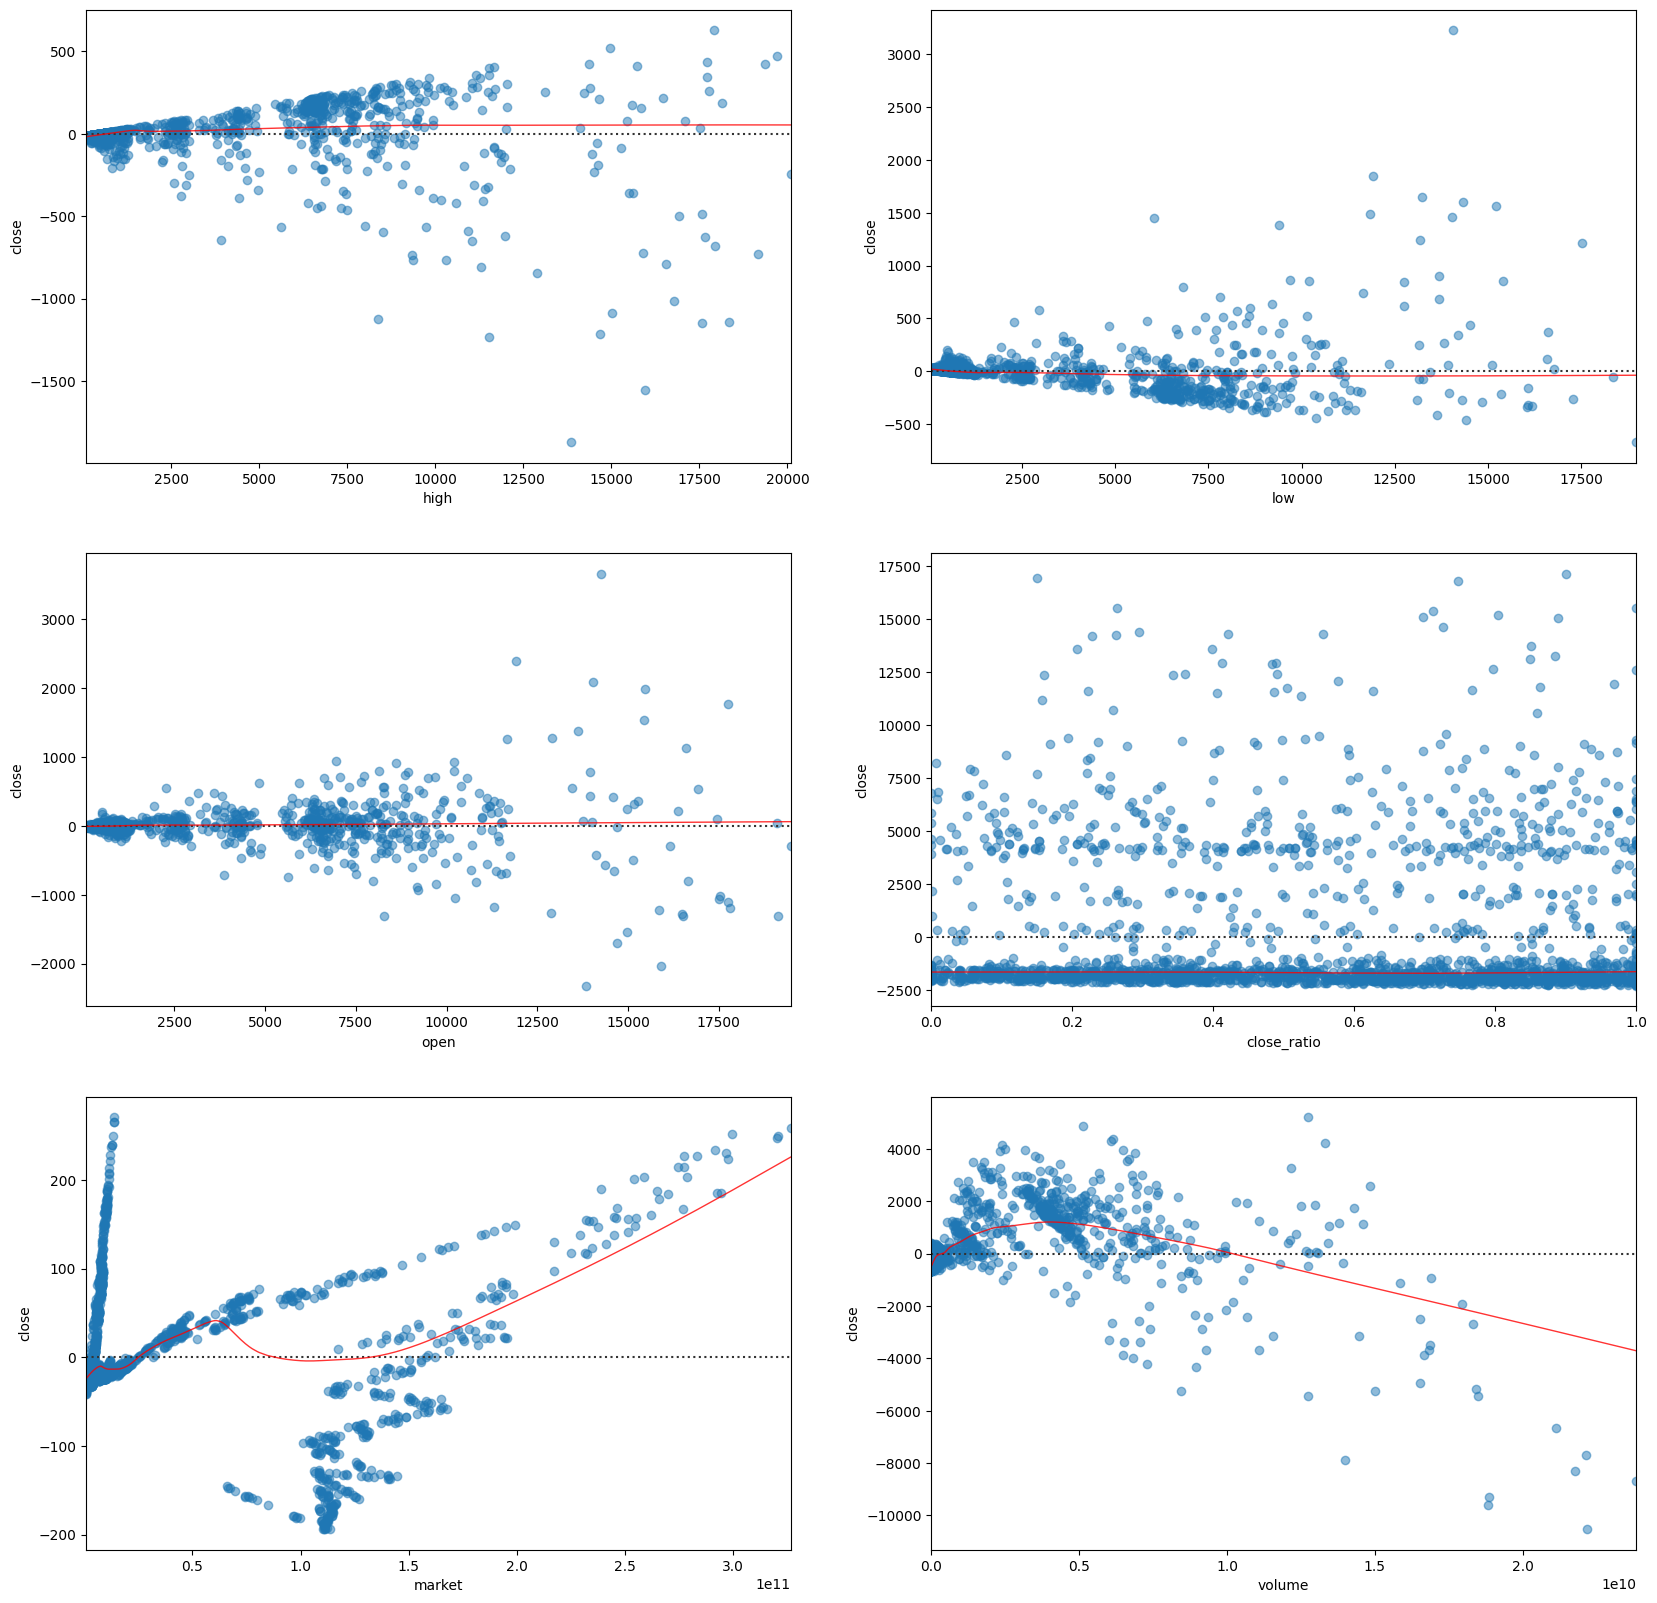

In [43]:
X = btc_df[['open', 'high', 'low', 'market', 'close_ratio', 'volume']]
y = btc_df[['close']]
y = y.astype('int')

f, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.residplot(x = X[['high']], y=y, lowess=True, ax=axes[0, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X[['low']], y = y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X[['open']],y=y, lowess=True, ax=axes[1, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X[['close_ratio']], y = y, lowess=True, ax=axes[1, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X[['market']],y = y, lowess=True, ax=axes[2, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X[['volume']], y=y, lowess=True, ax=axes[2, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


####After Removing outliers

<Axes: xlabel='volume', ylabel='close'>

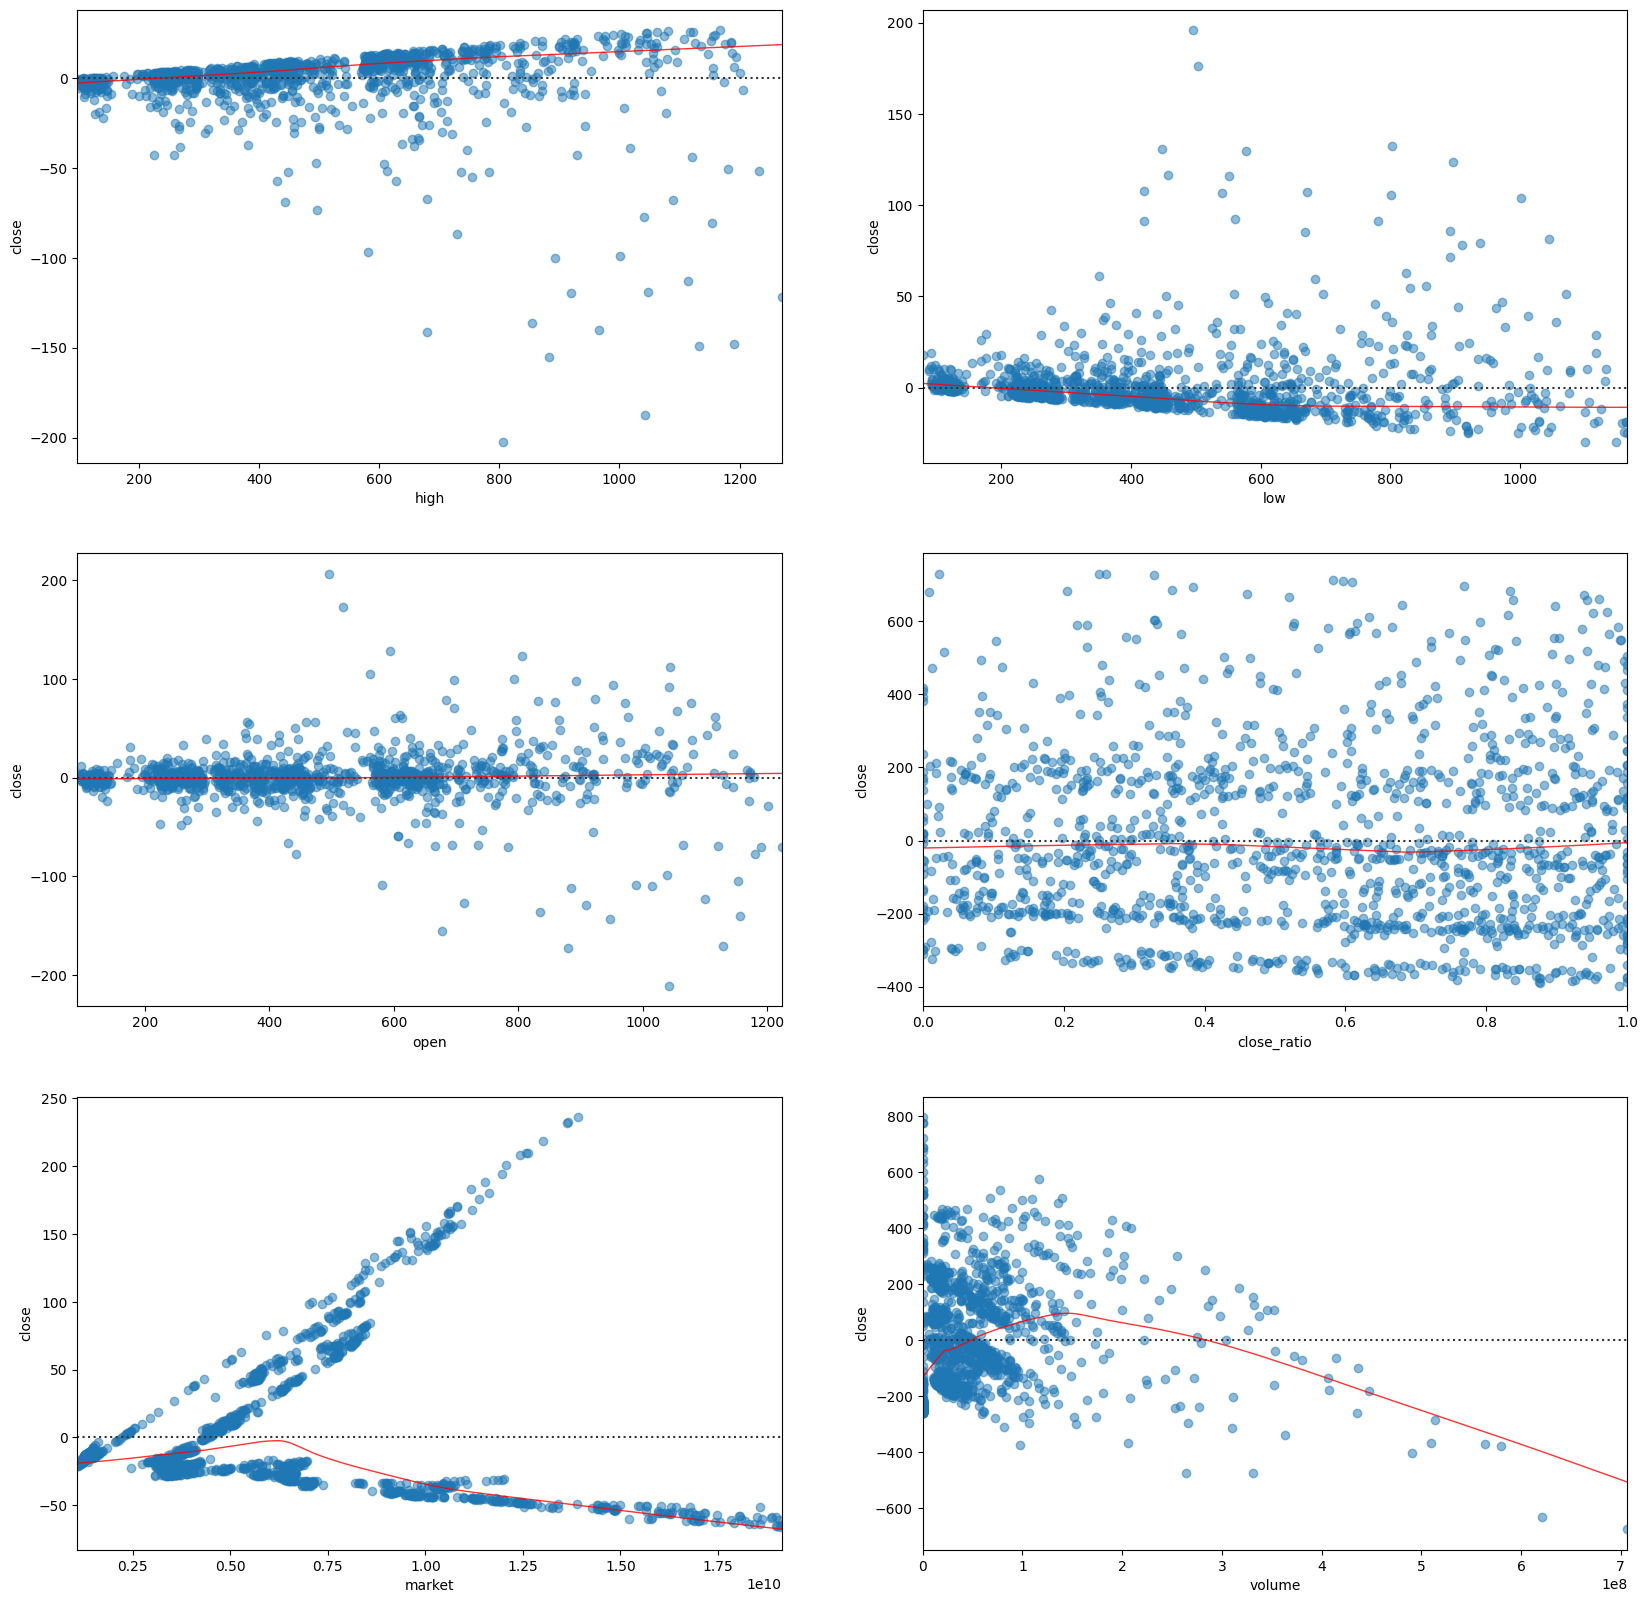

In [45]:
# based on the plots we can calculate thresholds to remove outliers
min_threshold, max_threshold = btc_df.close.quantile([0.01,0.70]) # all values between 1 and 70 %
min_threshold, max_threshold
#removing those values and creating a new dataframe for closing price
btc_without_outlier = btc_df[(btc_df['close'] > min_threshold) & (btc_df['close'] < max_threshold)]
btc_without_outlier.head()
X_wo_outlier = btc_without_outlier[['open', 'high', 'low', 'market', 'close_ratio', 'volume']]
Y_wo_outlier = btc_without_outlier['close']


#plotting new graphs
f, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.residplot(x = X_wo_outlier[['high']], y=Y_wo_outlier, lowess=True, ax=axes[0, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X_wo_outlier[['low']], y = Y_wo_outlier, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X_wo_outlier[['open']],y=Y_wo_outlier, lowess=True, ax=axes[1, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X_wo_outlier[['close_ratio']], y = Y_wo_outlier, lowess=True, ax=axes[1, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X_wo_outlier[['market']],y = Y_wo_outlier, lowess=True, ax=axes[2, 0],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x = X_wo_outlier[['volume']], y=Y_wo_outlier, lowess=True, ax=axes[2, 1],
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


#**Feature Selection**
It is crucial in data analysis and ML that we do feature selection as it helps improve model performance by selecting the most relevant and informative features while excluding irrelevant or redundant ones. This process reduces overfitting, computational complexity, and multicollinearity, leading to faster training and inference times, enhanced model interpretability, and better handling of noisy data. By focusing on the essential features, feature selection enables the development of more efficient, scalable, and generalizable predictive models, contributing to better decision-making and insights from the data.


####Correaltion Matrix

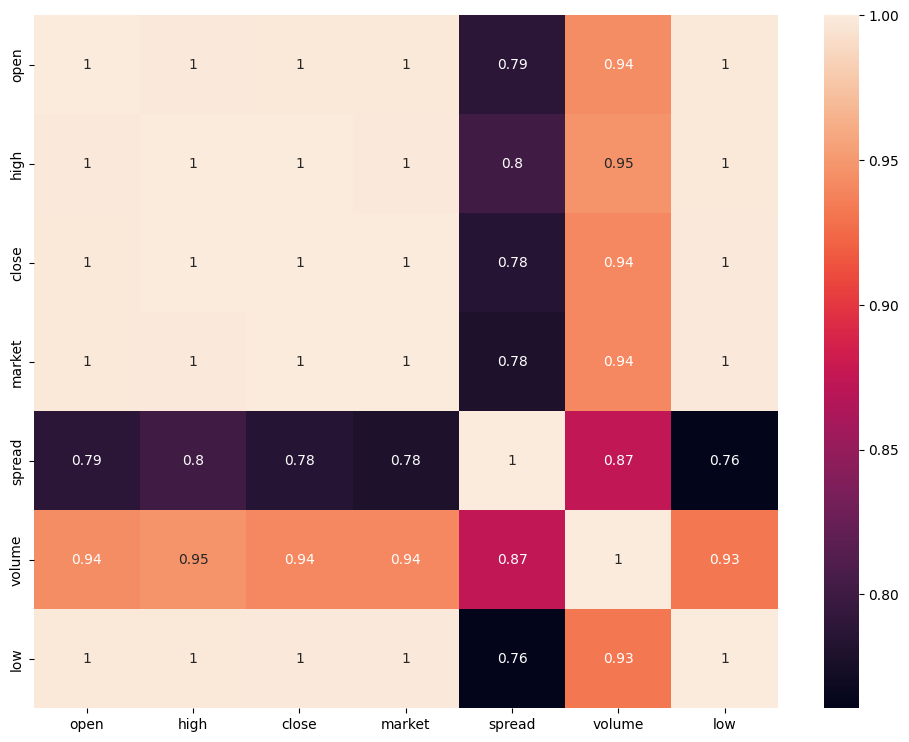

In [47]:
corrmat = btc_df[['open', 'high', 'close', 'market', 'spread', 'volume', 'low']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()


#### Pairwise Plot

From this pairplot we can observe that there is some corelation between certain features of the dataset that will help us in determining the `closing` price for the given day. For this we observe that `open`, `low`, `high` and `market` have strong corelations with the data. To dive into further detail we can plot a heatmap to qunatitatively determine how the effectively these parameters affect the closing price of bitcoin on any given day.


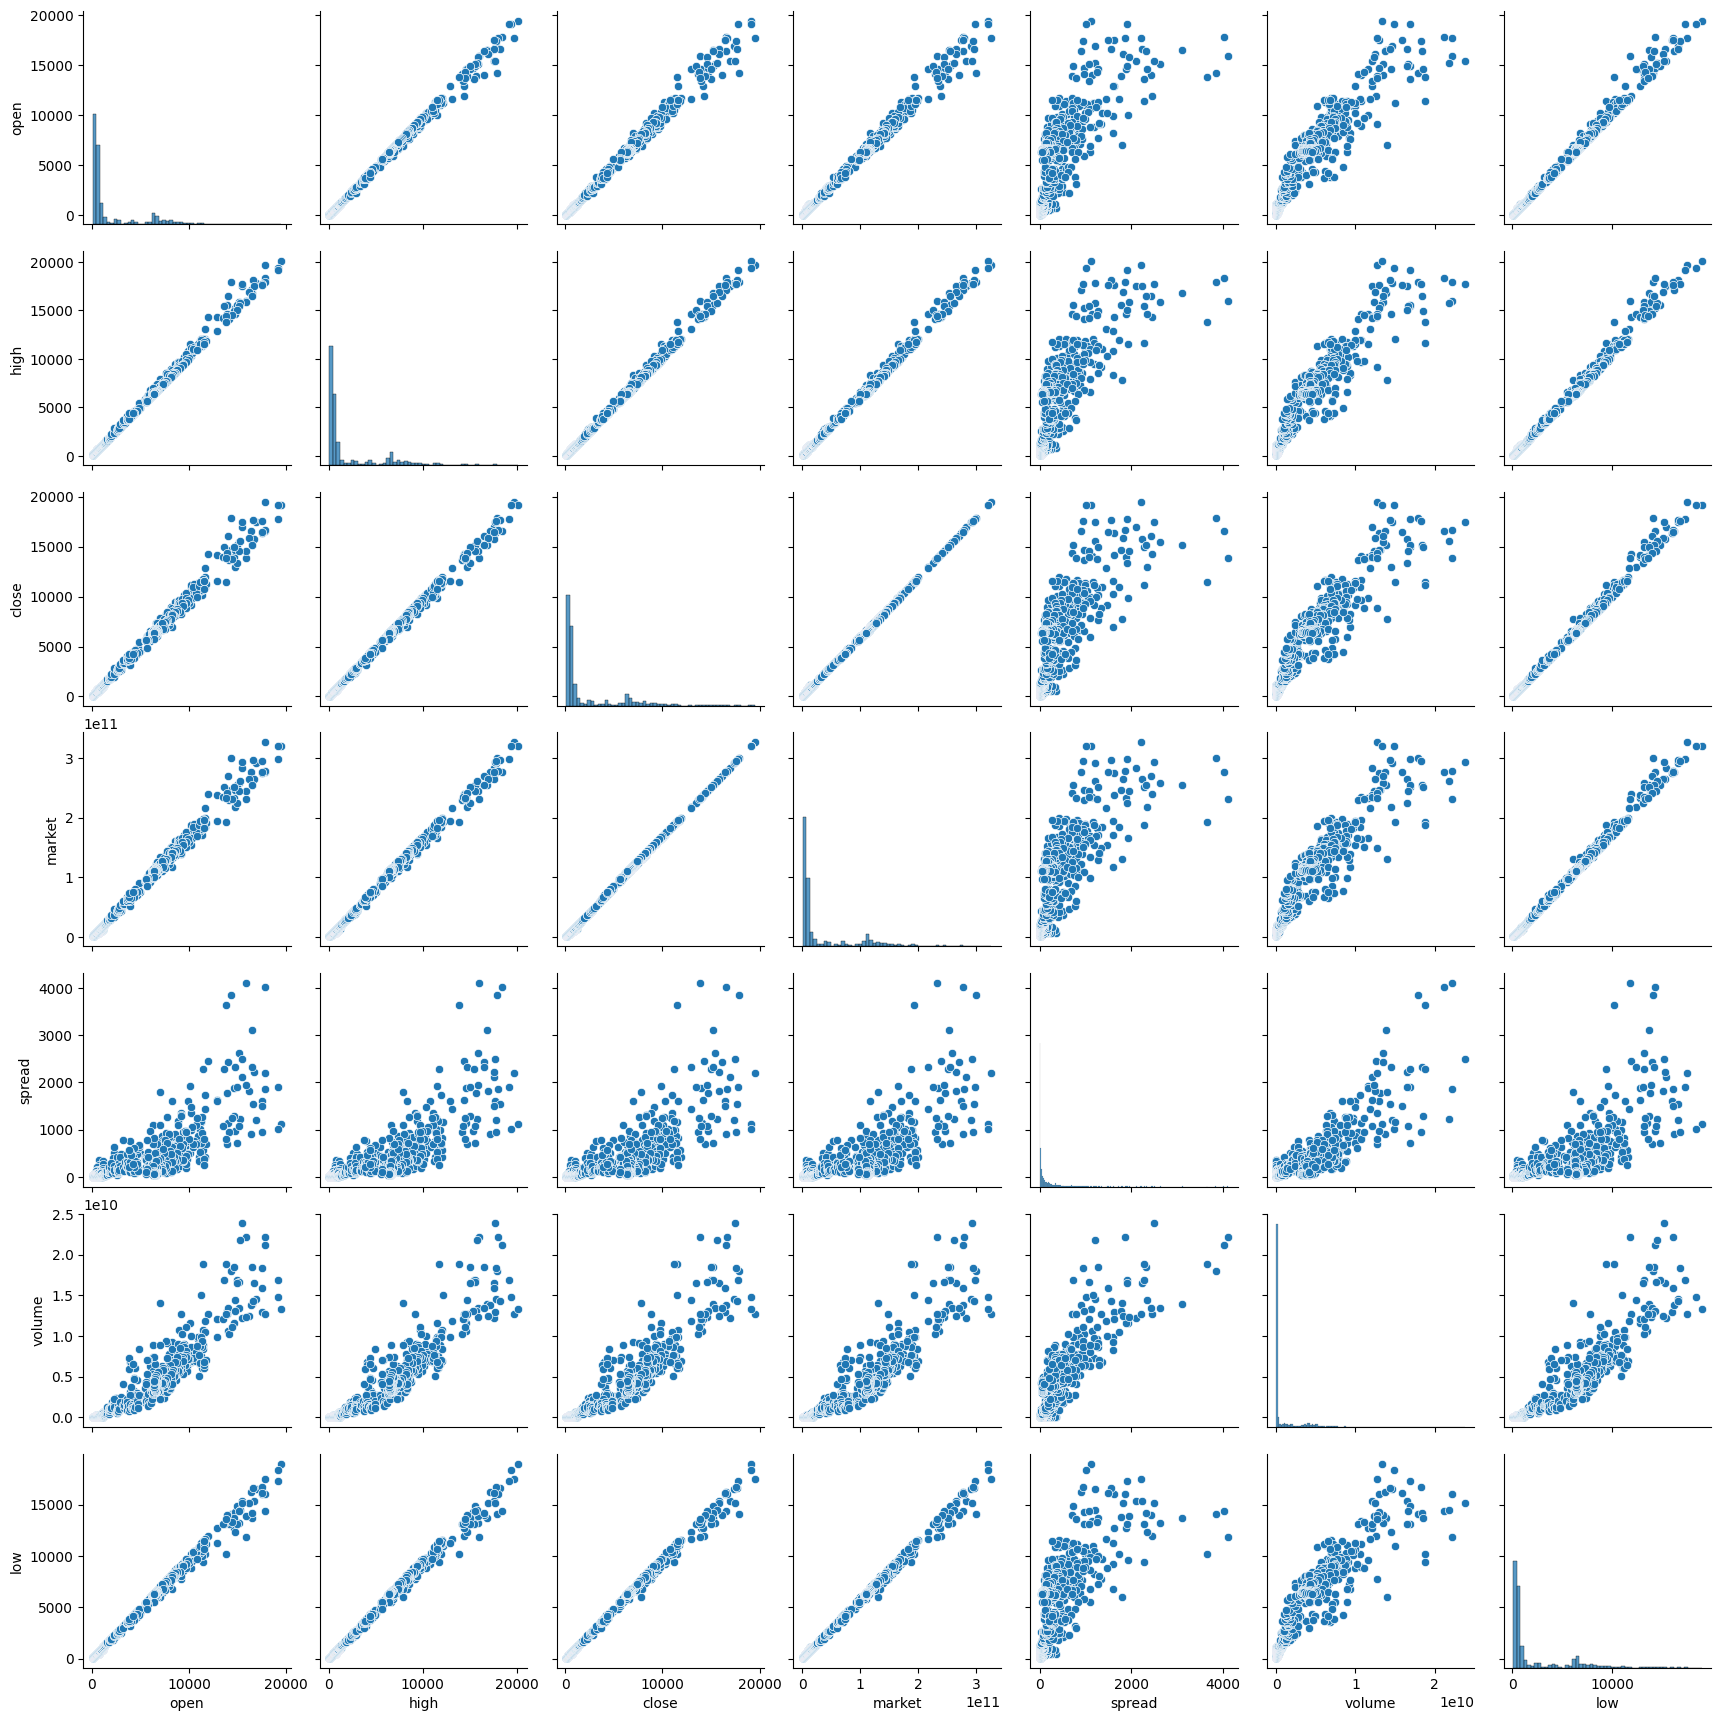

In [49]:
sns.pairplot(btc_df[['open', 'high', 'close', 'market', 'spread', 'volume', 'low']])


####P-Value test

In [51]:
import statsmodels.api as sm

p_value_test = sm.OLS(
    btc_df["close"],
    btc_df[["open","high","low","volume","market","spread"]],
).fit()

p_value_test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.051e+06
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:21:10   Log-Likelihood:                         -11196.
No. Observations:                2042   AIC:                                  2.240e+04
Df Residuals:                    2037   BIC:                                  2.243e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
open          -0.2606      0.010    -24.990      0.000      -0.281      -0.240
high           0.4339      0.010     45.464      0.000       0.415       0.453
low            0.3050      0.010     31.256      0.000       0.286       0.324
volume     -1.756e-08   1.66e-09    -10.569      0.000   -2.08e-08   -1.43e-08
market        3.1e-08   6.67e-10     46.497      0.000    2.97e-08    3.23e-08
spread         0.1290      0.005     24.740      0.000       0.119       0.139
==============================================================================
Omnibus:                      609.353   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32555.174
Skew:                          -0.583   Prob(JB):                         0.00
Kurtosis:                      22.526   Cond. No.                     3.45e+23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.37e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

####Feature Importance Graph
With this feature importance graph we can observe how the closing price on any particular day has been effected with the given predictor variables. From this graph it is evident that we can select certain features such as `high` `market` and `low` to determine the closing price of BTC on any particular day.


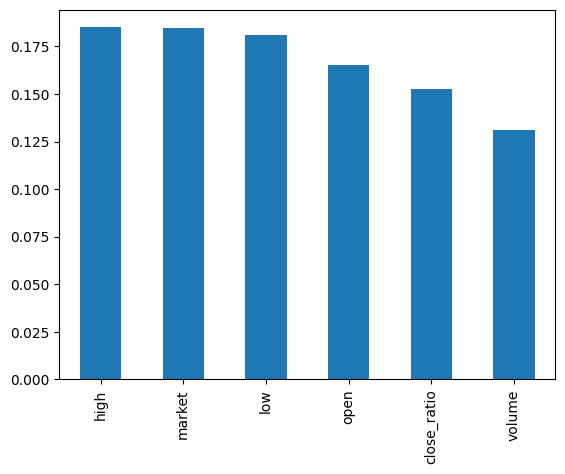

In [52]:
# now we can plot it and get a feature importance graph
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'bar')
plt.show()


#**Modelling**

For modelling, we are planning on employing several different techniques to see which model fits best for our data. In this we will cover few of the algorithms to repdict our `close` price for each day and plot a few graphs that can help us compare our models and determine their accuracy. For this we are going to employ all the algorithms that are present using `Auto ML (h2o.ai)`


In [53]:
!pip3 install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.6 MB/s eta 0:00:00


In [54]:
import h2o
import matplotlib as plt
from h2o.automl import H2OAutoML

h2o.init(strict_version_check=False)
cryptoDF = h2o.import_file("https://media.githubusercontent.com/media/sampurng/INFO6105/main/crypto-markets.csv")
cryptoDF = cryptoDF[cryptoDF["symbol"] == "BTC"]
cryptoTrain, cryptoTest = cryptoDF.split_frame(ratios=[0.8])
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=["open", "high", "low", "volume", "market", "close_ratio", "spread"], y="close", training_frame=cryptoTrain)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp70fpalmj
  JVM stdout: /tmp/tmp70fpalmj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp70fpalmj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_cf3w45
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240403_13631


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    84                 84                          65744                  6            6            6             34            64            57.6548

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 27.497095811253878
RMSE: 5.24376733000749
MAE: 3.5786805336404006
RMSLE: 0.007843893485803603
Mean Residual Deviance: 27.497095811253878

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4632.883566420073
RMSE: 68.06528899828513
MAE: 22.09508320392836
RMSLE: 0.01692227102252262
Mean Residual Deviance: 4632.883566420073

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0            nan           nan           nan           nan           nan
loglikelihood           nan        0            nan           nan           nan           nan           nan
mae                     22.0946    2.19901      21.4176       23.4886       23.2357       23.8032       18.5281
mean_residual_deviance  4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
mse                     4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
r2                      0.999604   0.000112872  0.999516      0.999567      0.999612      0.999529      0.999795
residual_deviance       4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
rmse                    67.3878    10.6614      74.8552       70.8757       67.4753       74.6288       49.1041
rmsle                   0.0168788  0.00138021   0.0146728     0.0164333     0.017737      0.0180999     0.0174507

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 01:37:26  3.609 sec   0                  3419.79          2606.39         1.1695e+07
    2024-04-03 01:37:27  3.634 sec   5                  2019.87          1538.87         4.07986e+06
    2024-04-03 01:37:27  3.660 sec   10                 1193.4           908.703         1.4242e+06
    2024-04-03 01:37:27  3.691 sec   15                 705.24           536.659         497363
    2024-04-03 01:37:27  3.724 sec   20                 416.659          316.945         173605
    2024-04-03 01:37:27  3.756 sec   25                 246.837          187.31          60928.7
    2024-04-03 01:37:27  3.789 sec   30                 146.07           110.546         21336.6
    2024-04-03 01:37:27  3.822 sec   35                 87.0684          65.4055         7580.9
    2024-04-03 01:37:27  3.857 sec   40                 52.3515          38.7689         2740.68
    2024-04-03 01:37:27  3.898 sec   45                 31.9919          23.1721         1023.48
    2024-04-03 01:37:27  3.931 sec   50                 20.2311          14.1951         409.299
    2024-04-03 01:37:27  3.965 sec   55                 13.4881          9.17224         181.928
    2024-04-03 01:37:27  3.995 sec   60                 9.93339          6.59624         98.6722
    2024-04-03 01:37:27  4.024 sec   65                 7.96215          5.24284         63.3958
    2024-04-03 01:37:27  4.055 sec   70                 6.92132          4.51872         47.9047
    2024-04-03 0

In [55]:
results = aml.leaderboard
results

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_5_AutoML_1_20240403_13631,22.0951,68.0653,4632.88,0.0169223,4632.88
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_13631,25.8373,74.3168,5522.99,0.029221,5522.99
StackedEnsemble_AllModels_1_AutoML_1_20240403_13631,28.0332,76.7743,5894.29,0.0512165,5894.29
GBM_4_AutoML_1_20240403_13631,31.5793,139.758,19532.3,0.0261413,19532.3
GBM_2_AutoML_1_20240403_13631,32.2122,141.67,20070.4,0.0262481,20070.4
GBM_3_AutoML_1_20240403_13631,32.3616,140.518,19745.4,0.0265203,19745.4
GBM_grid_1_AutoML_1_20240403_13631_model_1,34.8961,143.209,20509,0.0273153,20509
XGBoost_3_AutoML_1_20240403_13631,39.3115,109.355,11958.5,0.0304793,11958.5
XGBoost_grid_1_AutoML_1_20240403_13631_model_1,39.9262,137.688,18957.9,0.0234697,18957.9
DRF_1_AutoML_1_20240403_13631,42.3215,118.869,14129.8,0.0524372,14129.8


As we can see in the above results obtained with the H2o.ai Auto ML models, we have the respective models that have been used by the AutoML library and the residuals of each of those models, specifically, we get to see how each model performs on the basis of the following:
##- MAE (Mean Average Error)
The mean average error refors to the average of all the errors that we encounter from our predicted values. It can be obtained with the following formula. <br/>
\begin{align}
MAE &= \sum_{i=1}^{D}|x_i-y_i|
\end{align}

##- MSE (Mean Squared Error)
The mean squared error is the sqaured of the mean error that we calcualte. The difference here is that with this method, we can penalize outliers heavily and not have those outliers affect the efficacy of the model. To calcumate the MSE,we can use the following formula.
\begin{align}
 MSE &= \sum_{i=1}^{D}(x_i-y_i)^2
\end{align}

##- RMSE (Root mean Sqaured Error)
RMSE commonly reffered to as the root mean squared error provides a measure of the average magnitude of the errors in the predicted values. It is the root of the MSE but is more interpretable and gives us an idea of the standard deviation of the errors as well. It can be represented with the following formula.
\begin{align}
 MSE &= \sqrt{\sum_{i=1}^{D}(x_i-y_i)^2} = \sqrt{MSE}
\end{align}


##- RMSLE (Root mean Squared Logarithmic Error)
The logarithmic error is less sensitive towards outliers and does not penalize the model as much. It is highly interpretable as we take logs of values here and is highly effective in handling skewed data. We can garner from the EDA that most distributions were fat tailed and hence we can conclude that teh `RMSLE` will be the most effective parameter in determining the efficacy of models for this set. It can be calcualted using the given formula.
\begin{align}
RMSLE &= \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2}
\end{align}
Where:
- n  is the number of samples.
- $y_i$ is the true target value for the $( i )-th$ sample.
- $\hat{y}_i$  is the predicted target value for the $( i )-th$ sample.

##- Mean Residual Deviance
The mean residual deviance is a measure of model fit commonly used in the context of generalized linear models (GLMs), particularly in logistic regression. It measures the average discrepancy between observed and predicted values, with lower values indicating better model fit. It measures the overall fit of the model and allows for better comaprison and aids in interpretability. it can be calcualted with the given formula.
\begin{align}
  MRD &= \frac{1}{n} \sum_{i=1}^{n} d_i^2
\end{align}
Where:
-  n is the number of observations.
-  $d_i$ is the residual for the $( i )-th$ observation, calculated as <br/>
\begin{align}
d_i = y_i - \hat{y}_i
\end{align}
-  $y_i$ is the observed response and $\hat{y}_i$ is the predicted response.


#Model 1 - Gradient Boost Machine
In GBM, decision trees are built sequentially, with each tree attempting to correct the errors made by the previous trees. This model was chosen on the given error parameters above by the autoML library. We can now test the following model for its efficacy on our testing dataset. To do that first we need to get our model fromm the `aml` variable.

In [56]:
GBM_best_model = aml.get_best_model()
#let's look at how what are the details of the model.
GBM_best_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240403_13631


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    84                 84                          65744                  6            6            6             34            64            57.6548

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 27.497095811253878
RMSE: 5.24376733000749
MAE: 3.5786805336404006
RMSLE: 0.007843893485803603
Mean Residual Deviance: 27.497095811253878

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4632.883566420073
RMSE: 68.06528899828513
MAE: 22.09508320392836
RMSLE: 0.01692227102252262
Mean Residual Deviance: 4632.883566420073

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0            nan           nan           nan           nan           nan
loglikelihood           nan        0            nan           nan           nan           nan           nan
mae                     22.0946    2.19901      21.4176       23.4886       23.2357       23.8032       18.5281
mean_residual_deviance  4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
mse                     4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
r2                      0.999604   0.000112872  0.999516      0.999567      0.999612      0.999529      0.999795
residual_deviance       4632.05    1314.68      5603.3        5023.37       4552.92       5569.46       2411.21
rmse                    67.3878    10.6614      74.8552       70.8757       67.4753       74.6288       49.1041
rmsle                   0.0168788  0.00138021   0.0146728     0.0164333     0.017737      0.0180999     0.0174507

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 01:37:26  3.609 sec   0                  3419.79          2606.39         1.1695e+07
    2024-04-03 01:37:27  3.634 sec   5                  2019.87          1538.87         4.07986e+06
    2024-04-03 01:37:27  3.660 sec   10                 1193.4           908.703         1.4242e+06
    2024-04-03 01:37:27  3.691 sec   15                 705.24           536.659         497363
    2024-04-03 01:37:27  3.724 sec   20                 416.659          316.945         173605
    2024-04-03 01:37:27  3.756 sec   25                 246.837          187.31          60928.7
    2024-04-03 01:37:27  3.789 sec   30                 146.07           110.546         21336.6
    2024-04-03 01:37:27  3.822 sec   35                 87.0684          65.4055         7580.9
    2024-04-03 01:37:27  3.857 sec   40                 52.3515          38.7689         2740.68
    2024-04-03 01:37:27  3.898 sec   45                 31.9919          23.1721         1023.48
    2024-04-03 01:37:27  3.931 sec   50                 20.2311          14.1951         409.299
    2024-04-03 01:37:27  3.965 sec   55                 13.4881          9.17224         181.928
    2024-04-03 01:37:27  3.995 sec   60                 9.93339          6.59624         98.6722
    2024-04-03 01:37:27  4.024 sec   65                 7.96215          5.24284         63.3958
    2024-04-03 01:37:27  4.055 sec   70                 6.92132          4.51872         47.9047
    2024-04-03 0

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

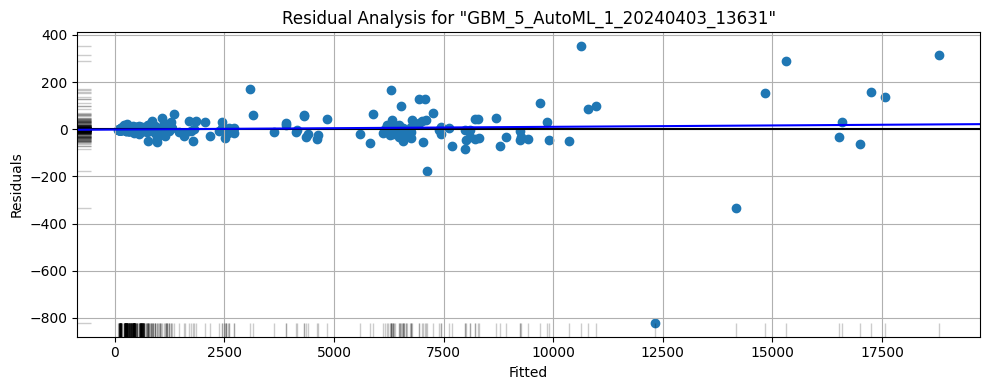

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

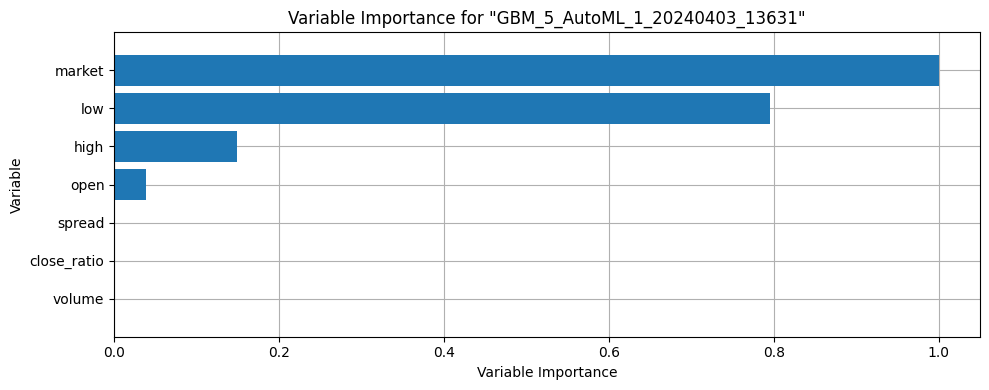

In [58]:
explain_model = aml.explain(frame = cryptoTest, figsize = (10,4), include_explanations=['varimp', "residual_analysis"])


##Regularizing
We can further improve this model by regularizing the model and prevent some overfitting that might be present in the GBM.

In order to determine that, we need to regularize our model. There are several different types of regularization present. Here for GBM Estimator, we can use Ridge regression to check the different ${R^2}$ values and based on that we can see if regualrization helps or not.


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
import numpy as np

X = btc_df[["open", "high", "low", "market", "close_ratio", "volume", "spread"]]
y = btc_df[["close"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)
Ridge(alpha=0.5)
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

rmse


44.32942714202538

As we can observe after regularization the new RMSE is `44.32` whereas before that we were getting a value of `68.06`. We can confidently say taht regularization has helped our model.


#Model 2 - Stacked Ensemble

The basic idea behind Ensemble stack is that there are level 0 and level1 models created absed on certain hyper parameters and then they are both combined to predict values with the lease MSE. Ensemble stacking can often improve predictive performance compared to using individual base models alone by leveraging the strengths of different models and reducing the risk of overfitting. It is a powerful technique in machine learning ensemble methods and is commonly used in competitions and real-world applications.




##Overview


In [81]:
ensembleStack_model = h2o.get_model("StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_13631")
print(ensembleStack_model.base_models)
ensembleStack_model

['GBM_5_AutoML_1_20240403_13631', 'XGBoost_3_AutoML_1_20240403_13631', 'DRF_1_AutoML_1_20240403_13631', 'XRT_1_AutoML_1_20240403_13631', 'DeepLearning_1_AutoML_1_20240403_13631', 'GLM_1_AutoML_1_20240403_13631']


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


###VIF (Stacke Ensemble)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
df = cryptoTrain[['open', 'high', 'low', 'spread', 'market', 'volume', 'close', 'close_ratio']].as_data_frame()
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,variables,VIF
0,open,1.606279e+03
1,high,inf
2,low,inf
3,spread,4.503600e+15
4,market,3.788288e+03
5,volume,2.049011e+01
6,close,7.509373e+03
7,close_ratio,2.172898e+00


### Model Explanation

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

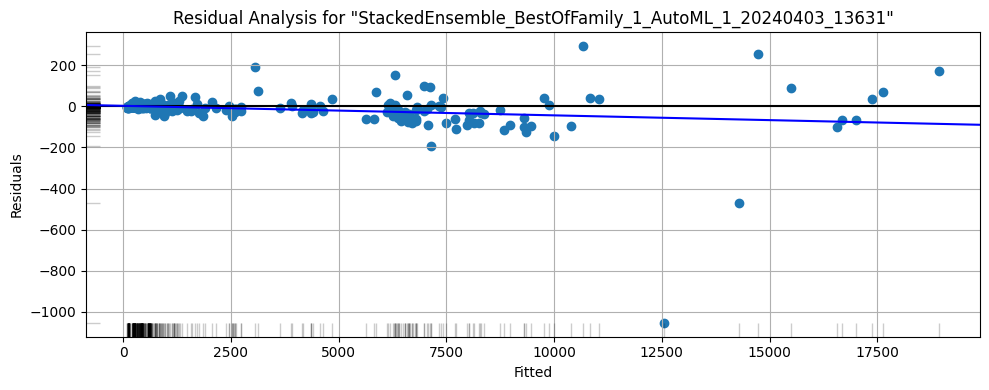

In [76]:
explain_model = ensembleStack_model.explain(frame = cryptoTest, figsize = (10,4), include_explanations=['varimp', "residual_analysis"])


###Multicolinearity

In [77]:
base_model_predictions = ensembleStack_model.predict(cryptoTrain)
base_model_predictions.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
137.894
121.975
112.322
102.509
113.36
117.018
116.807
113.5
113.938
113.821


##Reglualrizing
We can again employe ridge regression to get the ${R^2}$ values to comapre and see if there is any help that we can get with regularization. Since stacked ensemble estimator is a compilation of all the models listed above, with GBM being the most prominenmt, It can be safely assugmed that regularization will help becasuse it was the case for GBM.


#Model 3 - Random Forest

We will use a tree based algorithm to create our model on out cleaned dataset and compare the performace with the other models.

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

X = btc_df[["open", "high", "low", "market", "close_ratio", "volume", "spread"]]
y = btc_df[["close"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Creating a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=25, max_depth=5, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Root Mean Squared Error:", math.sqrt(mse_rf))
print("Random Forest R-squared Score:", r2_rf)




Random Forest Root Mean Squared Error: 101.46051175022353
Random Forest R-squared Score: 0.9990769418900348


#**Interpretability**

Teh best way to interpret our models is to perform a SHAP analysis on all of our models. This way we will have a quantitave sense on how to compare our models.

#Model 1



In [99]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


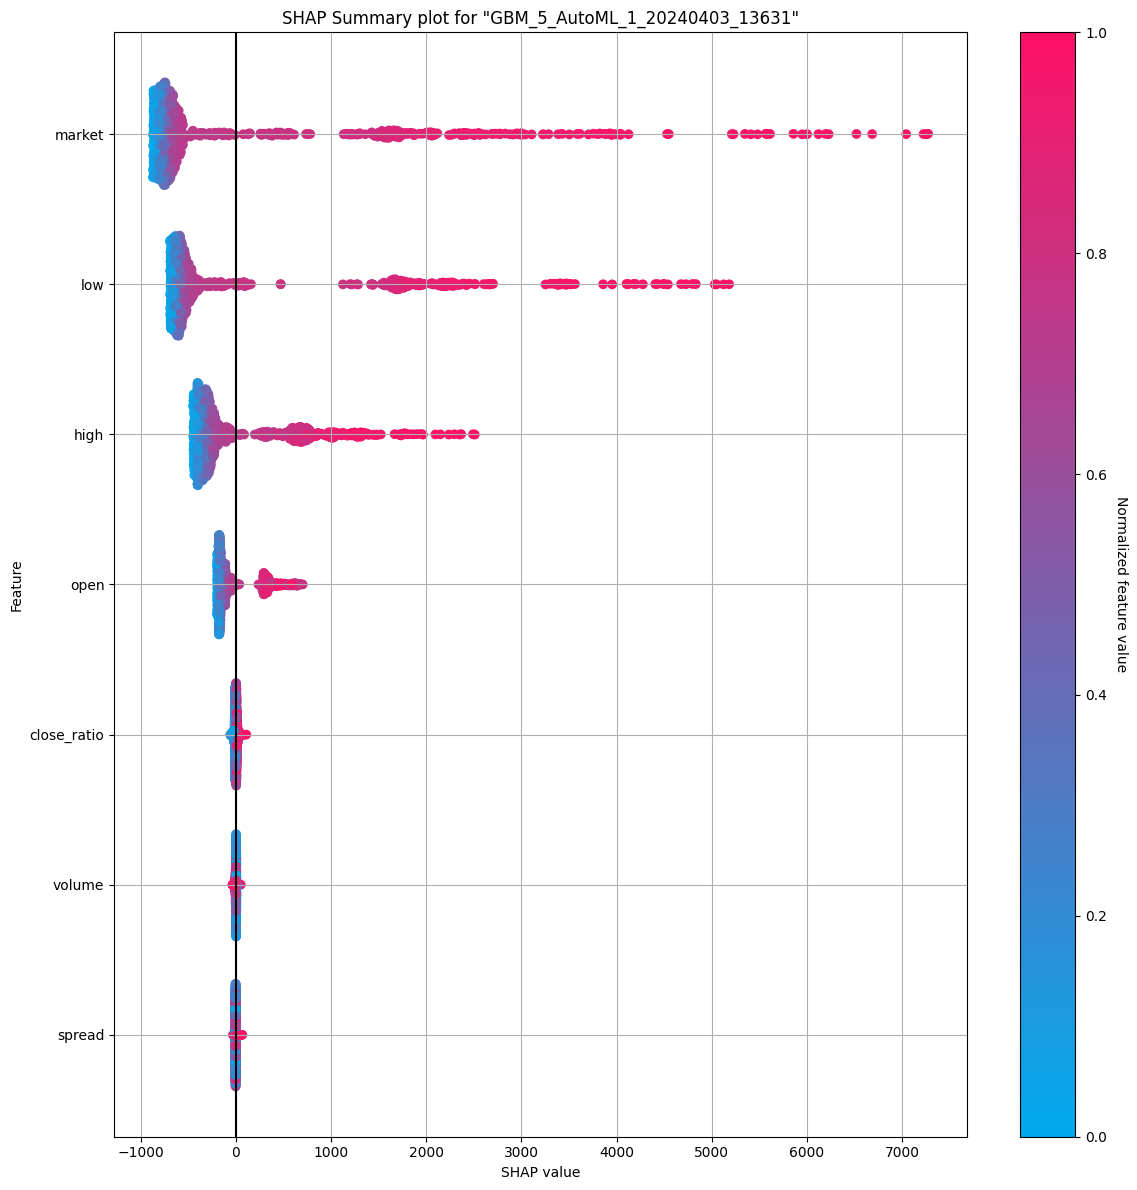

In [102]:
import shap

shap_values = GBM_best_model.predict_contributions(cryptoTrain)

GBM_best_model.shap_summary_plot(cryptoTrain)


##Stacked Ensemble

Since stacekd ensemble are a colelction of differnt models suited for differnt parts of the dataset, we cannot actually do a shap analysis of all the models present in there. We can use `RMSE` to interpret the accuracy of our model.

##Random Forest



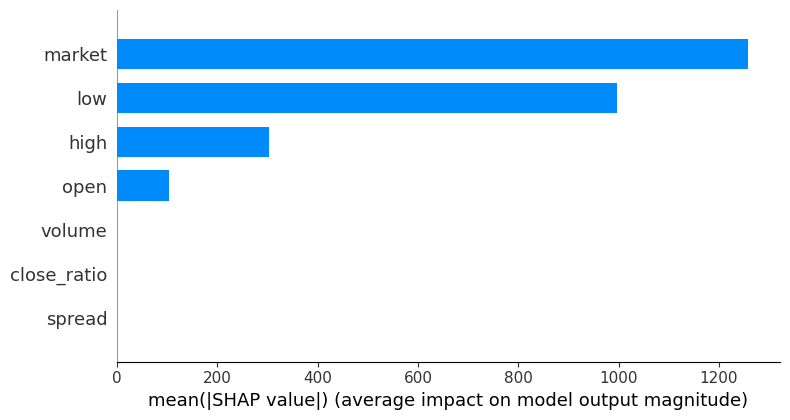

In [127]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


#**Conclusion**



#What is the question?

The question for our notebook here was to create a machine learning model taht can be used for Time Series Data and help us predict our `close` price for `Bitcoin` for every day starting from 2017. It was a combination of various features of ML that could be used to better our understanding of the model and predicitng prices such that similar mdoels can be employed by trading companies to accurately predict prices of certain stocks/cryptocurrencies and to determine risk based on the data that we are provided.




#What did you do?

We performed a series of ML tasks to determine how our data responds to certain mdoels and how datset can be better used to predict the close price. We followed a five step plan to accurately predict the `close` price.
1. We explored our given dataset, to analyse what kind of data we are dealing with.
2. We wrangled our dataset so that we could only look at the most important data that helped us in determining our `close` price and not get swayed by data that was illegible.
3. From that data we selected features, cetrain features that have helped us understand how the `close` price reacts to a particular feature and how these features are corelated with each other as well.
4. We used several differnt models to against our insight rich dataset to extract those insights and help us predict data.
5. We compared, analyzed and interpretted those models in order to further understand which one works best for our given dataset.

# How well did it work?

To comapre our models, we can use the `rmse` factor to ensure that the best mdoesl were only taken, Out of all the models taht we have seen with teh help of h2o and Random forest, The best model that we were able to obtain was a Graadient Boost Machine algorithm with regulatization, that gave us an rmse of `42.44` which given how volative the cryptocurrency market is, this is a great measure of our prediction.

The following two models that we looked at gave us a rmse of `62` and `101` respectively, which is good but not as well as the GBN model. In total we can say that the GBM model landed with an accuracy of `91.36%` for our cryptocurrency dataset. In an unregualted market such as crypto, these prediction give us a good measure of how the `close` price will vary each day.

# What did you learn
The learning from this notebook can be summarized in a four fold manner.
---
1. **Data is never perfect**<br/>
 I looked over the dataset and thought it to be perfect but diving deppeer into it , i realized that it is far from it. inconsistencies, outliers and nonsensical data will result in a bad overall outcome. if this is not treated at the grassroot level, the insights that we draw from our model will be highly inaccurate. <br/><br/>
---
<br/>

2. **Models aren't everything**<br/>
 Treating data such that we could make it meaningful for our model is the essence of data science, sure learning new models and algorithms will help explore more options but those options will not be optmized to their maximum potential if the data is not suitable. <br/><br/>


---
<br/>

3. **Interpretting Models is Crucial**<br/>
However models taht we create, if we do not have an understanding of the model and how it varies, it will not help us in gving good isnights or even useful ones as it is not interpretted in the right way.
---
<br/>

4. **Vizualization**<br/>
The human brain can is configured for geometry. If we do not visualize our results we will never truly understand it's importance. Patterns can be recognized with visualization which can never be interpretted from just looking at tables.

##Licences


1. [H2o.AI](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
2. [Pandas 1.4](https://pandas.pydata.org/docs/getting_started/overview.html)
3. [Kaggle Dataset](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies/)
4. [SkLearn Estimators](https://scikit-learn.org/stable/developers/develop.html)
5. [Pandas 1.4](https://pandas.pydata.org/docs/getting_started/overview.html)
6. [Kaggle Dataset](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies/)
7. [SkLearn Estimators](https://scikit-learn.org/stable/developers/develop.html)
8. [impyute 3.7 by Elton Law]( https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions)
9. [Scipy.stats]( https://docs.scipy.org/doc/scipy/reference/stats.html)
10. sklearn simpleimputer (https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
11. [sklearn.LinearRegression, GridSearch] (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)




MIT License

Copyright (c) 2023 Sampurna

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


##References
1. [Karl Dornsainvl ](https://medium.com/@kdorsain/dealing-with-multicollinearity-of-features-2b13bc42fbe1)
2. [AI Skunks]( https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML)
3. [ChatGPT](https://chat.openai.com/)
4. [Mehul Gupta](https://medium.com/data-science-in-your-pocket/understanding-partial-dependence-plots-pdps-415346b7e7f1)
5. [Model Explainaibility](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html#:~:text=The%20h2o.,utility%20functions%20outside%20the%20h2o.)
6. [Conor O'Sullivan - Introduction to SHAP with Python ](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
7. [ML Data Cleaning and Feature Selection]( https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb)

8. [Distributions](  https://colab.research.google.com/drive/1yfYU0XWn9EdTGhlY0Msf8l4K5XkPa-qK?usp=sharingLinks)

9. [Imputation] (https://www.youtube.com/watch?v=fYhr8eF1uboLinks)

